In [6]:
%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from matplotlib.patches import Polygon

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import umap
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [7]:
data=pd.read_csv('/home/wallhorn/vame_projects/bl6_vs_nex_Project-Feb28-2023/videos/pose_estimation/nexcre_het_oft_naive_2195_trimmed.csv')

headers = data.iloc[0] + '_' + data.iloc[1]
new_df  = pd.DataFrame(data.values[2:], columns=headers)
new_df.drop(columns=['bodyparts_coords'], inplace=True)
new_df=new_df.astype('float')


In [8]:
new_df

,nose_x,nose_y,nose_likelihood,left_ear_x,left_ear_y,left_ear_likelihood,right_ear_x,right_ear_y,right_ear_likelihood,neck_center_x,...,neck_center_likelihood,left_hip_x,left_hip_y,left_hip_likelihood,right_hip_x,right_hip_y,right_hip_likelihood,tail_base_x,tail_base_y,tail_base_likelihood
0,443.166412,408.718506,0.990607,461.987946,403.514923,0.997783,446.338715,391.386536,0.996500,460.860779,...,0.998476,504.278534,354.391785,0.999647,474.992371,341.956238,0.999922,496.780457,326.930847,0.999987
1,441.493073,405.431702,0.988233,460.177551,404.011688,0.998725,445.839447,389.197357,0.998363,460.986969,...,0.998954,504.100891,354.441040,0.999723,474.932495,341.828613,0.999932,497.181732,327.204590,0.999986
2,440.110077,400.299866,0.992377,454.043030,403.084229,0.996137,444.919708,388.856598,0.998610,460.174225,...,0.999377,503.994629,355.137848,0.999670,474.918243,341.544434,0.999945,497.467224,327.000031,0.999987
3,439.184723,399.765656,0.995707,452.867432,402.869202,0.998471,443.881683,388.899658,0.998954,458.770844,...,0.999490,504.108124,355.248688,0.999616,474.795135,341.313629,0.999939,497.682800,327.203918,0.999987
4,438.632599,401.257477,0.997707,453.922821,403.145599,0.999282,442.365570,389.384003,0.999331,458.035950,...,0.999542,504.323639,355.485901,0.999622,474.788727,341.329102,0.999941,498.231201,327.687683,0.999985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18012,930.816284,290.067688,0.995651,911.750977,289.801361,0.999732,920.396301,303.797760,0.999982,913.801392,...,0.999951,869.091980,308.591553,0.999997,881.190002,341.158722,0.999997,857.942383,335.832367,0.999932
18013,932.427917,288.813904,0.989708,912.137451,288.754303,0.999314,921.169861,303.341888,0.999949,914.320679,...,0.999919,870.262695,306.412537,0.999995,883.154663,339.714233,0.999997,859.457703,335.414856,0.999934
18014,933.478699,287.502228,0.991181,915.021667,286.529449,0.999216,924.443420,300.802917,0.999866,916.193054,...,0.999925,872.204041,305.900635,0.999995,885.936462,338.024475,0.999993,860.891724,335.042480,0.999935
18015,934.437134,287.709076,0.990501,915.981445,286.257233,0.998918,925.221436,301.031097,0.999811,917.256531,...,0.999914,873.247864,305.082489,0.999995,888.085022,336.286224,0.999974,863.564514,336.407684,0.999959


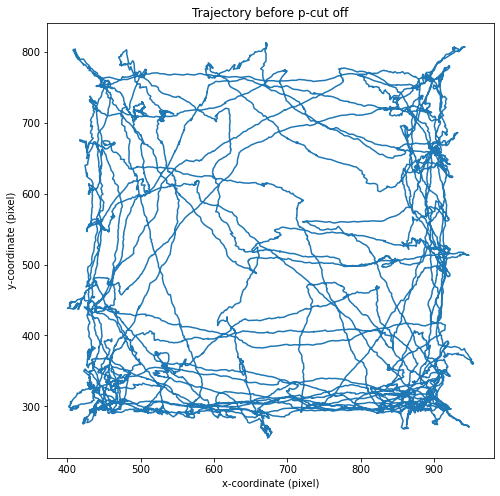

In [10]:
fig=plt.figure(figsize=(8,8))
plt.plot(new_df['neck_center_x'], new_df['neck_center_y'])

ax=plt.gca()
plt.xlabel('x-coordinate (pixel)')
plt.ylabel('y-coordinate (pixel)')
plt.title('Trajectory before p-cut off')
plt.show()


Now you can definde a p-cut off and check how many time points where not tracked

In [33]:
p_cut_off=0.95

likelihood_bool=new_df['neck_center_likelihood']<p_cut_off
print(likelihood_bool.value_counts())

False    17855
True       162
Name: neck_center_likelihood, dtype: int64


In [34]:
new_df['neck_center_x'][likelihood_bool]=np.nan
new_df['neck_center_y'][likelihood_bool]=np.nan

#print(new_df['neck_center_x'].isna().sum())

In [35]:
new_df=new_df.interpolate(method='linear')

In [36]:
new_df=new_df.interpolate(method='pad')

<IPython.core.display.Javascript object>


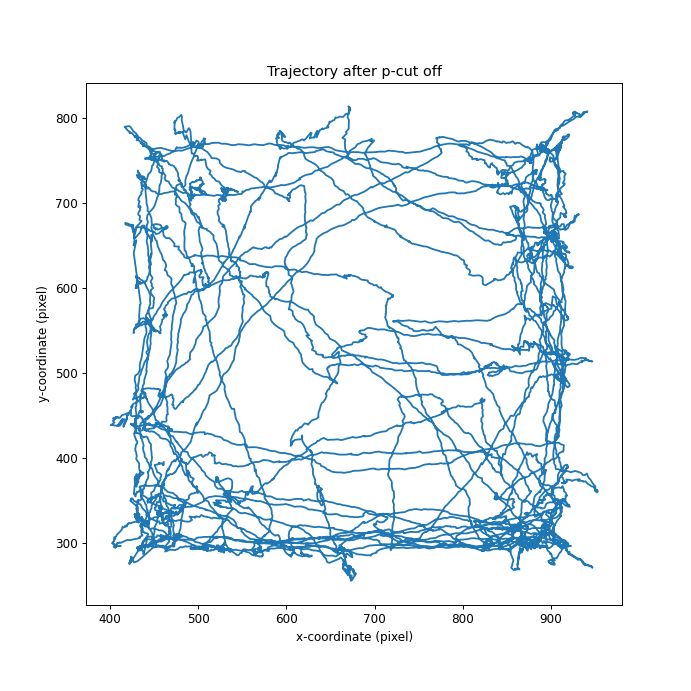

In [37]:
fig=plt.figure(figsize=(8,8))
plt.plot(new_df['neck_center_x'], new_df['neck_center_y'])

ax=plt.gca()
plt.xlabel('x-coordinate (pixel)')
plt.ylabel('y-coordinate (pixel)')
plt.title('Trajectory after p-cut off')
plt.show()

In [40]:
#X = all_combined.iloc[:, :-2]
X_scaled = StandardScaler().fit_transform(new_df)

reducer = umap.UMAP(n_neighbors=30,
                    min_dist=0.2,
                   random_state=123)

embedding = reducer.fit_transform(X_scaled)

<IPython.core.display.Javascript object>


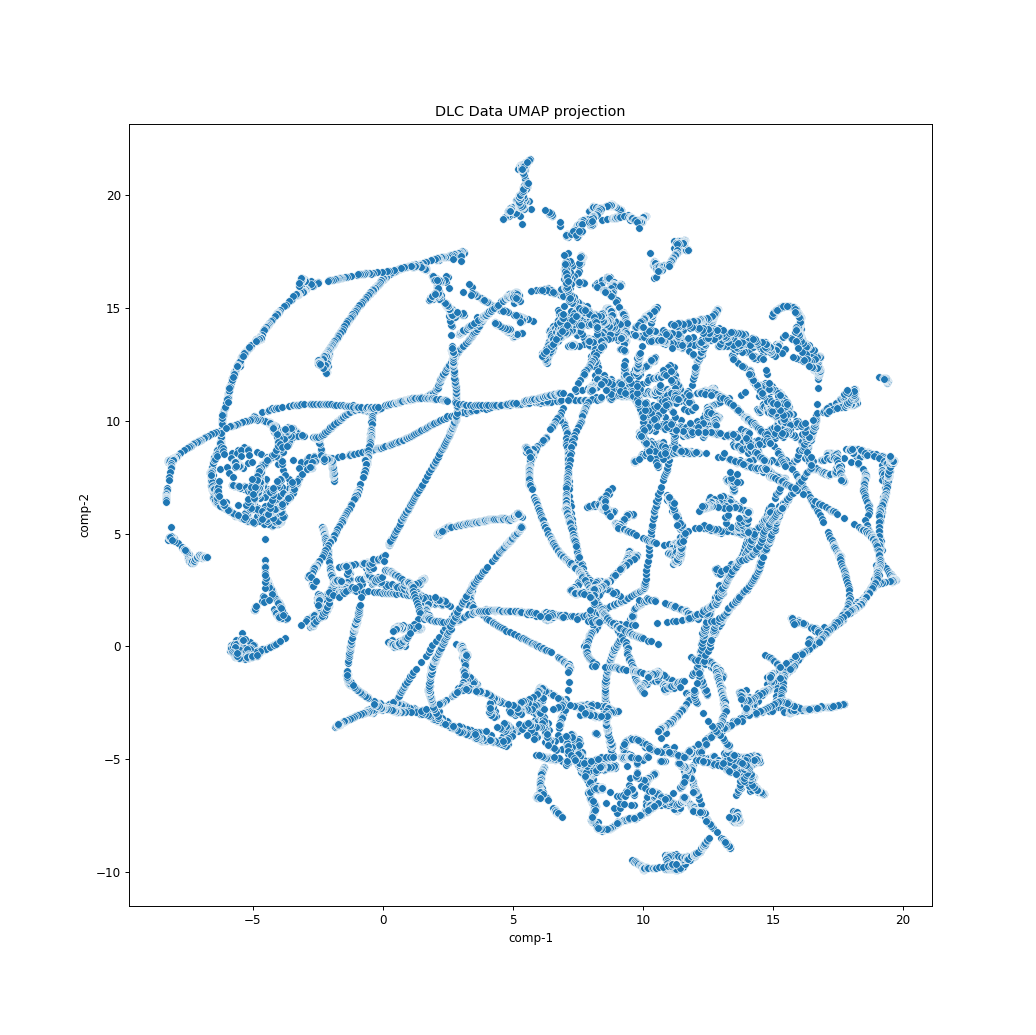

In [41]:
df_umap = pd.DataFrame()
#df_umap["y"] = all_combined.iloc[:, -2]
df_umap["comp-1"] = embedding[:,0]
df_umap["comp-2"] = embedding[:,1]

plt.figure(figsize=(10,10))
ax=sns.scatterplot(x="comp-1", y="comp-2", data=df_umap,s=40).set(title="DLC Data UMAP projection") 
#plt.savefig('/home/wallhorn/vame_projects/fig_oft_epm/mean_usage_umap_kindoftest.svg', dpi=300, format='svg' )
plt.show()

<IPython.core.display.Javascript object>


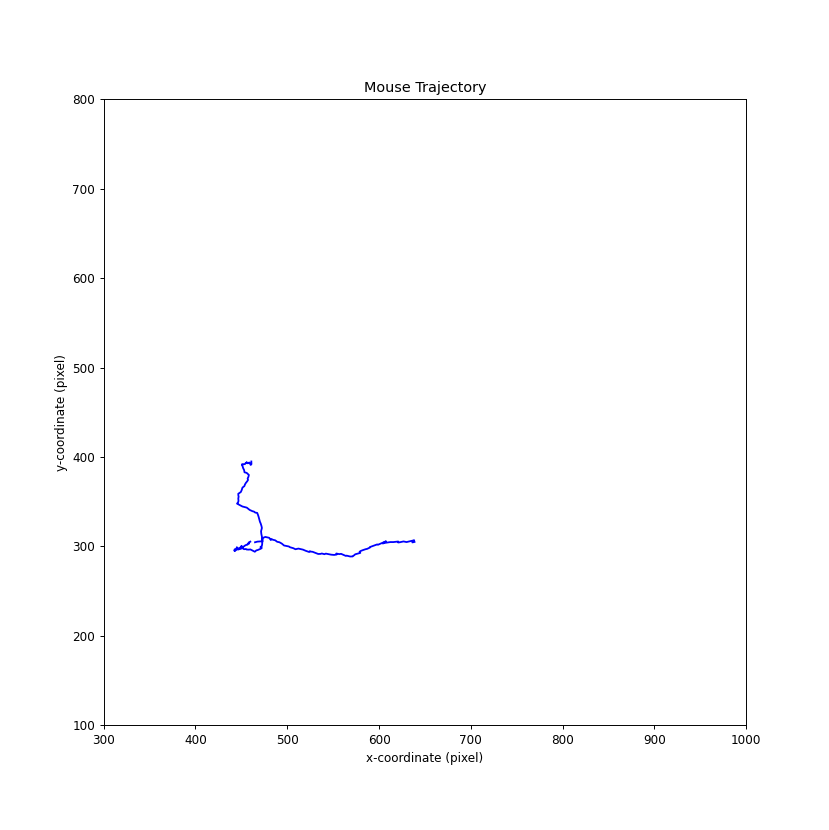

In [29]:
%matplotlib notebook

# Create a figure and axis object for the animation
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Set the limits of the x and y axes based on the minimum and maximum values of the tracked data
xmin, xmax = new_df['neck_center_x'].min(), new_df['neck_center_x'].max()
ymin, ymax = new_df['neck_center_y'].min(), new_df['neck_center_y'].max()
#ax.set_xlim([xmin-10, xmax+10])
#ax.set_ylim([ymin-10, ymax+10])

# Define a function to update the scatter plot for each frame
def update(frame):
    ax.clear()
    ax.plot(new_df['neck_center_x'][:frame+1], new_df['neck_center_y'][:frame+1], color='blue')
    ax.set_xlabel('x-coordinate (pixel)')
    ax.set_ylabel('y-coordinate (pixel)')
    ax.set_title('Mouse Trajectory')
    ax.set_xlim([300,1000])
    ax.set_ylim([100,800])
    
# Create the animation using the update function and the number of frames
ani = animation.FuncAnimation(fig, update, frames=len(new_df), interval=50, repeat=True)

# Display the animation
plt.show()


<IPython.core.display.Javascript object>


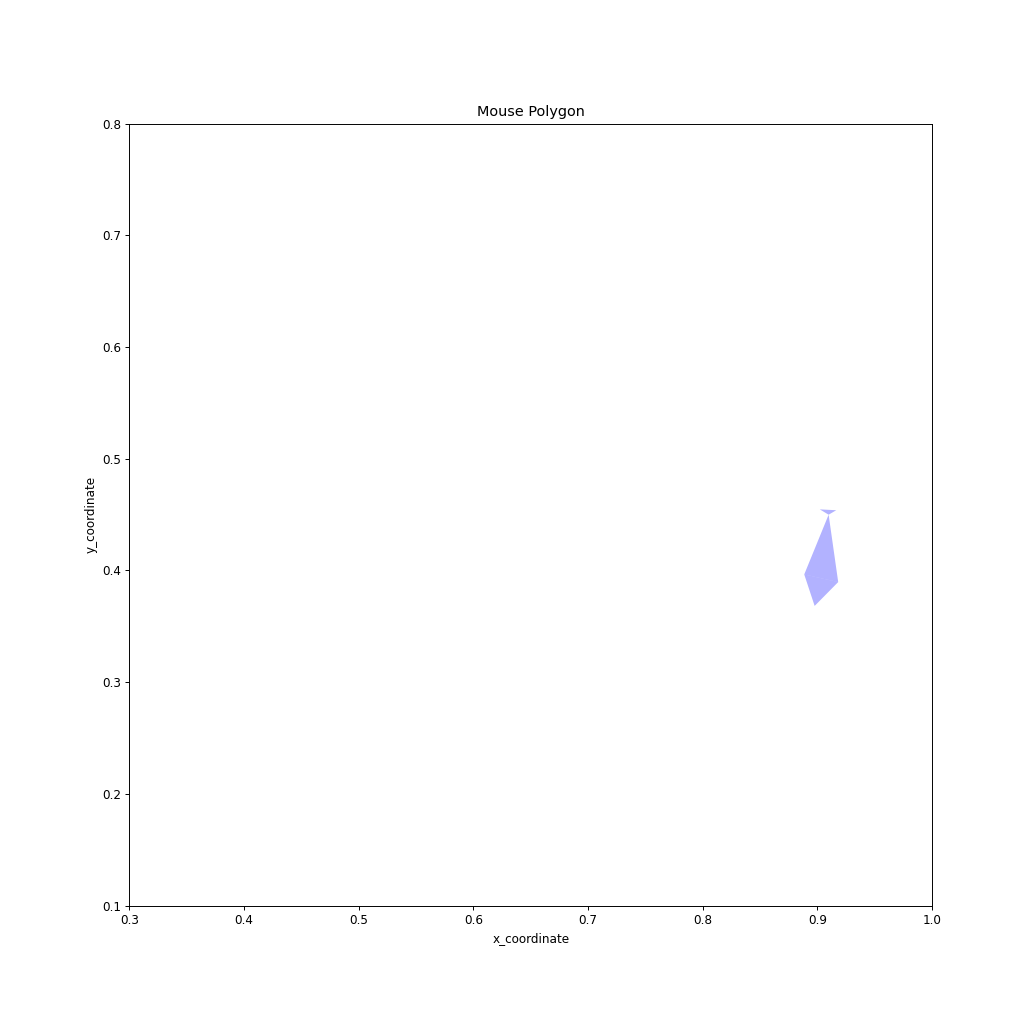

In [31]:
%matplotlib notebook
label_list=['nose', 'left_ear', 'right_ear', 'neck_center', 'left_hip', 'right_hip', 'tail_base']
p_cut_off=0.95

for i in label_list:
    
    likelihood_bool=new_df[''.join([i, '_likelihood'])] <p_cut_off
    new_df[''.join([i, '_x'])][likelihood_bool]=np.nan
    new_df[''.join([i, '_y'])][likelihood_bool]=np.nan


fig,ax = plt.subplots()
fig.set_size_inches(10, 10)


def update(frame):
    #for plot_frame_no in len(new_df):


        #plot_frame_no=598


        x_coordinates=[]
        y_coordinates=[]

        xy_list=[]
        for ii in label_list:
            x_label=''.join([ii, '_x'])
            y_label=''.join([ii, '_y'])

            i_coordinates=[]
            i_coordinates.append(new_df.loc[frame, x_label])
            i_coordinates.append(new_df.loc[frame, y_label])
            xy_list.append(i_coordinates)


            x_coordinates.append(new_df.loc[frame, x_label])
            y_coordinates.append(new_df.loc[frame, y_label])

        xy_array=np.array(xy_list)    
        xy_array_1=xy_array[:3]/1000
        xy_array_2=xy_array[1:4]/1000
        xy_array_3=xy_array[3:6]/1000
        xy_array_4=xy_array[4:]/1000

        p_1 = Polygon(xy_array_1, facecolor = 'blue', closed=True, alpha=0.3)
        p_2 = Polygon(xy_array_2, facecolor = 'blue', closed=True, alpha=0.3)
        p_3 = Polygon(xy_array_3, facecolor = 'blue', closed=True, alpha=0.3)
        p_4 = Polygon(xy_array_4, facecolor = 'blue', closed=True, alpha=0.3)


        ax.clear()
        ax.add_patch(p_1)
        ax.add_patch(p_2)
        ax.add_patch(p_3)
        ax.add_patch(p_4)
        ax.set_xlim([0.3,1])
        ax.set_ylim([0.1,0.8])
        plt.xlabel('x_coordinate')
        plt.ylabel('y_coordinate')
        plt.title('Mouse Polygon')
        

# Create the animation using the update function and the number of frames
ani = animation.FuncAnimation(fig, update, frames=len(new_df), interval=50, repeat=True)

# Display the animation
plt.show()